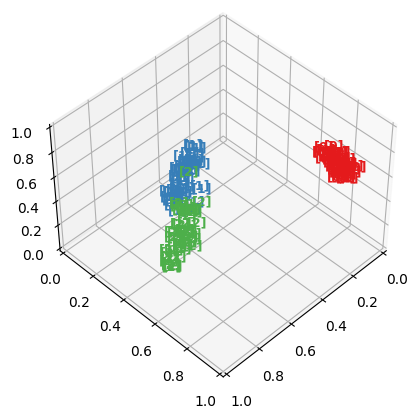

[0.92461872 0.05306648]


/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:8

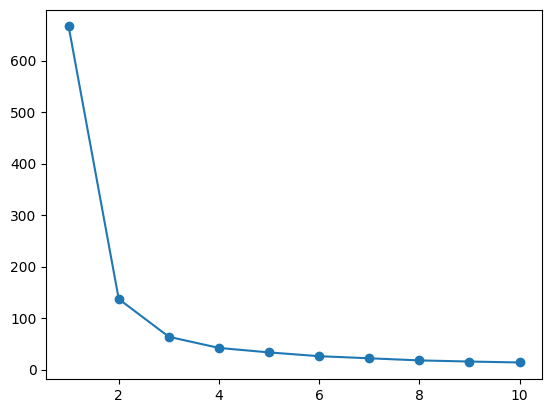

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:8

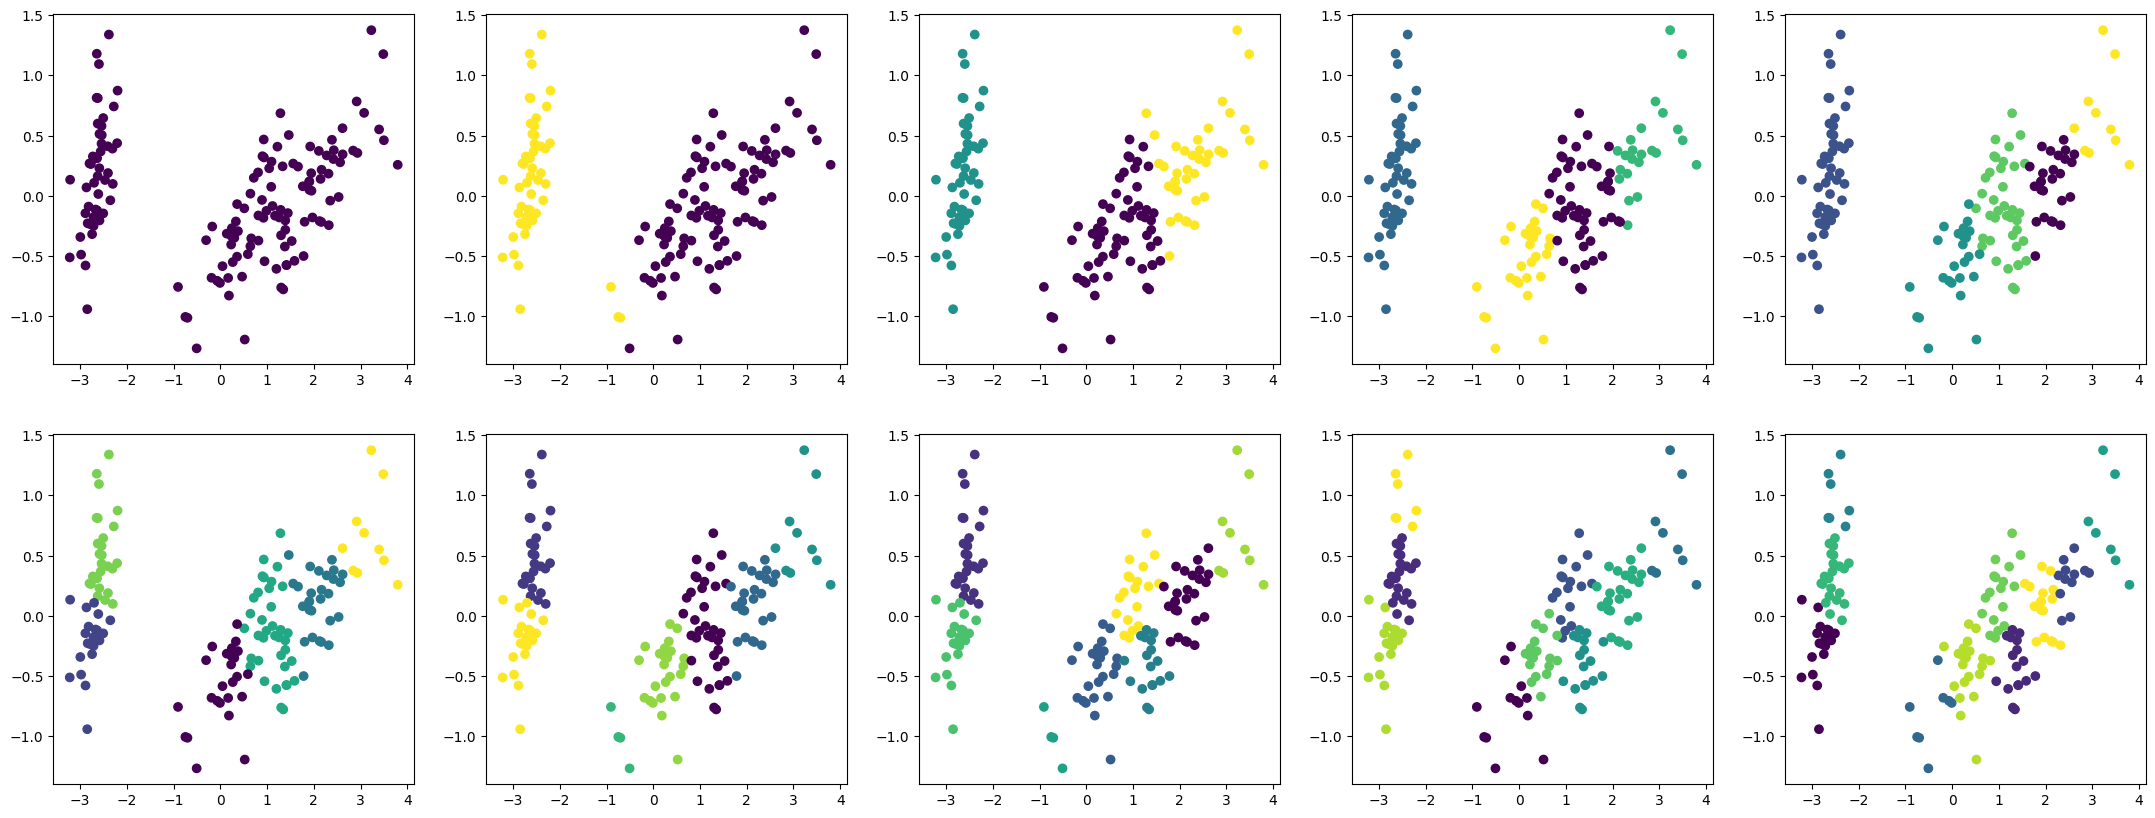

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn import manifold

data = load_iris()
df = pd.DataFrame(data["data"], columns=data["feature_names"])
x = np.array(df.iloc[:, 0:4])
y = np.array(data["target"]).reshape(-1, 1)

# t-SNE
tsne = manifold.TSNE(n_components=3, init="pca")
x_tsne = tsne.fit_transform(x)
x_min, x_max = x_tsne.min(), x_tsne.max()
x_norm = (x_tsne - x_min) / (x_max - x_min)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.view_init(azim=45, elev=45)
for i in range(x_norm.shape[0]):
    ax.text(x_norm[i, 0], x_norm[i, 1], x_norm[i, 2], str(y[i]), color=plt.cm.Set1(y[i]), fontdict={"weight": "bold", "size": 9})
plt.show()

# PCA
pca = PCA(n_components=2)
new_x = pca.fit_transform(x)
print(pca.explained_variance_ratio_)
x = new_x

# K-Means
inertia = []
n_classes = 10
for k in range(1, n_classes + 1, 1):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(x)
    inertia.append(kmeans.inertia_)

plt.figure()
plt.plot(range(1, n_classes + 1, 1), inertia, marker='o')
plt.show()


width = 5
plt.figure(figsize=(width * (n_classes + 1) // 2, width * 2))
i = 0
for k in range(1, n_classes + 1, 1):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(x)

    i = i + 1
    ax = plt.subplot(2, (n_classes + 1) // 2, i)
    ax.scatter(x[:, 0], x[:, 1], c=kmeans.labels_)